This code is used to load and inspect datasets stored in HDF5 (`.h5`) format using the `h5py` library. Here's a breakdown of what each part does:

1. **Imports the `h5py` Library**:
   - The `h5py` library is used to read and write HDF5 files.

2. **File Paths**:
   - Two variables, `train_file_path` and `test_file_path`, store the paths to the training and testing `.h5` files, respectively.

3. **Loading and Inspecting the Training Dataset**:
   - The `train_file_path` is opened in read-only mode (`'r'`).
   - `train_keys` retrieves the names of all datasets within the training file.
   - `train_shapes` is a dictionary where each key (dataset name) maps to the shape of that dataset, providing its dimensions.

4. **Loading and Inspecting the Testing Dataset**:
   - Similarly, the `test_file_path` is opened and inspected in the same way to retrieve `test_keys` (dataset names) and `test_shapes` (shapes of the datasets).

5. **Final Output**:
   - The variables `train_keys`, `train_shapes`, `test_keys`, and `test_shapes` are returned, which contain information about the datasets in both the training and testing files.

This allows you to understand the structure of the data in both the training and testing `.h5` files.


In [26]:
#my sbu id = 115635694
import h5py

# Paths to the uploaded files
train_file_path = './train_catvnoncat.h5'
test_file_path = './test_catvnoncat.h5'

# Load and inspect the training dataset
with h5py.File(train_file_path, 'r') as train_file:
    train_keys = list(train_file.keys())
    train_shapes = {key: train_file[key].shape for key in train_keys}

# Load and inspect the testing dataset
with h5py.File(test_file_path, 'r') as test_file:
    test_keys = list(test_file.keys())
    test_shapes = {key: test_file[key].shape for key in test_keys}

train_keys, train_shapes, test_keys, test_shapes


(['list_classes', 'train_set_x', 'train_set_y'],
 {'list_classes': (2,),
  'train_set_x': (209, 64, 64, 3),
  'train_set_y': (209,)},
 ['list_classes', 'test_set_x', 'test_set_y'],
 {'list_classes': (2,), 'test_set_x': (50, 64, 64, 3), 'test_set_y': (50,)})

This code snippet demonstrates how to load, preprocess, and reshape image data from HDF5 files for use in machine learning models. Here’s a breakdown of what each section does:

1. **Imports `numpy`**:
   - The `numpy` library is imported to handle numerical operations, especially for array manipulation.

2. **Loading Data**:
   - The training and testing datasets are loaded from the HDF5 files (`train_catvnoncat.h5` and `test_catvnoncat.h5`) using the `h5py.File()` function.
   - The following data is extracted:
     - `train_x`: Image data from the training set.
     - `train_y`: Labels for the training set.
     - `class_labels`: List of class labels corresponding to the data.
     - `test_x`: Image data from the testing set.
     - `test_y`: Labels for the testing set.

3. **Preprocessing Data**:
   - **Normalization**: The pixel values in the image data are divided by 255.0 to normalize them to a range of [0, 1], making the data easier for models to work with.
     - `train_x = train_x / 255.0`
     - `test_x = test_x / 255.0`
   
4. **Flattening Image Data**:
   - The images are flattened from 2D arrays (height x width) into 1D arrays for each image. This is required when using models like logistic regression, which expect each image to be represented as a single feature vector.
     - `train_x_flattened = train_x.reshape(train_x.shape[0], -1).T`  
       (Shape: features x samples)
     - `test_x_flattened = test_x.reshape(test_x.shape[0], -1).T`
   
5. **Reshaping Labels**:
   - The labels (`train_y` and `test_y`) are reshaped into row vectors to match the expected format for training the model.
     - `train_y = train_y.reshape(1, -1)`  
       (Shape: 1 x samples)
     - `test_y = test_y.reshape(1, -1)`

6. **Final Output**:
   - The shapes of the following arrays are returned:
     - `train_x_flattened.shape`: The shape of the flattened training image data.
     - `test_x_flattened.shape`: The shape of the flattened testing image data.
     - `train_y.shape`: The shape of the reshaped training labels.
     - `test_y.shape`: The shape of the reshaped testing labels.

This prepares the data for use in machine learning models by normalizing, flattening, and reshaping the data.

In [27]:
# Student ID last digit
student_id_last_digit = 4

# Paths to the uploaded files
train_file_path = './train_catvnoncat.h5'
import numpy as np

# Load data from the files
with h5py.File(train_file_path, 'r') as train_file:
    train_x = np.array(train_file['train_set_x'])
    train_y = np.array(train_file['train_set_y'])
    class_labels = np.array(train_file['list_classes'])

# Preprocess the data: Normalize image data and reshape labels
train_x = train_x / 255.0  # Normalize pixel values to range [0, 1]
train_y = train_y / 255.0
# Custom split: first 160 + last digit of student ID in training
# Remaining in test set
train_indices = list(range(160 + student_id_last_digit))
test_indices = list(range(160 + student_id_last_digit, 209))

test_x = train_x[test_indices]
test_y = train_y[test_indices]
train_x = train_x[train_indices]
train_y = train_y[train_indices]


# Flatten image data for use in a logistic regression model
train_x_flattened = train_x.reshape(train_x.shape[0], -1).T  # Shape: (features, samples)
test_x_flattened = test_x.reshape(test_x.shape[0], -1).T

# Reshape labels to match dimensions expected in training
train_y = train_y.reshape(1, -1)  # Shape: (1, samples)
test_y = test_y.reshape(1, -1)

train_x_flattened.shape, test_x_flattened.shape, train_y.shape, test_y.shape


((12288, 164), (12288, 45), (1, 164), (1, 45))

In [28]:
def sigmoid(z):
    """
    Compute the sigmoid of z.

    Arguments:
    z -- A scalar or numpy array of any size.

    Returns:
    s -- sigmoid(z)
    """
    return 1 / (1 + np.exp(-z))


def initialize_parameters(dim):
    """
    Initialize the weights and bias.

    Arguments:
    dim -- Number of features.

    Returns:
    w -- Initialized weights, a numpy array of shape (dim, 1).
    b -- Initialized bias, a scalar.
    """
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b


def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient.

    Arguments:
    w -- Weights, a numpy array of shape (features, 1).
    b -- Bias, a scalar.
    X -- Data of shape (features, samples).
    Y -- Labels of shape (1, samples).

    Returns:
    cost -- Logarithmic loss for logistic regression.
    gradients -- Dictionary containing dw and db.
    """
    m = X.shape[1]

    # Forward propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # Backward propagation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    gradients = {"dw": dw, "db": db}
    return gradients, cost


def optimize(w, b, X, Y, num_iterations, learning_rate):
    """
    Optimize w and b using gradient descent.

    Arguments:
    w -- Weights, a numpy array of shape (features, 1).
    b -- Bias, a scalar.
    X -- Data of shape (features, samples).
    Y -- Labels of shape (1, samples).
    num_iterations -- Number of iterations of the optimization loop.
    learning_rate -- Learning rate for gradient descent.

    Returns:
    params -- Dictionary containing w and b.
    costs -- List of costs over iterations.
    """
    costs = []

    for i in range(num_iterations):
        # Calculate gradients and cost
        gradients, cost = propagate(w, b, X, Y)
        dw = gradients["dw"]
        db = gradients["db"]

        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)

    params = {"w": w, "b": b}
    return params, costs


def predict(w, b, X):
    """
    Predict using the learned logistic regression parameters.

    Arguments:
    w -- Weights, a numpy array of shape (features, 1).
    b -- Bias, a scalar.
    X -- Data of shape (features, samples).

    Returns:
    Y_prediction -- Predicted labels for X.
    """
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    Y_prediction = (A > 0.5).astype(int)
    return Y_prediction


# Initialize parameters
num_features = train_x_flattened.shape[0]
w, b = initialize_parameters(num_features)

# Train the logistic regression model
num_iterations = 2000
learning_rate = 0.005
params, costs = optimize(w, b, train_x_flattened, train_y, num_iterations, learning_rate)

# Retrieve trained weights and bias
w_trained = params["w"]
b_trained = params["b"]

# Make predictions
train_predictions = predict(w_trained, b_trained, train_x_flattened)
test_predictions = predict(w_trained, b_trained, test_x_flattened)

# Compute training and test accuracies
train_accuracy = 100 - np.mean(np.abs(train_predictions - train_y)) * 100
test_accuracy = 100 - np.mean(np.abs(test_predictions - test_y)) * 100

train_accuracy, test_accuracy


(99.86131037780966, 99.87799564270152)

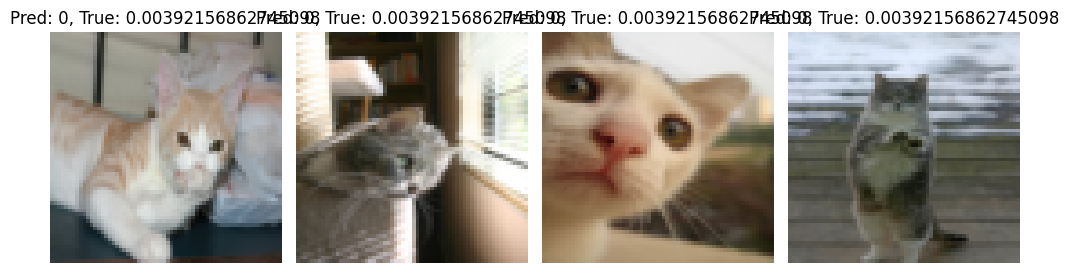

array([ 0,  2,  5,  6,  7, 10, 11, 13, 15, 21, 24, 28, 33, 36])

In [29]:
import matplotlib.pyplot as plt

# Identify misclassified indices in the test set
misclassified_indices = np.where(test_predictions != test_y)[1]

# Display four misclassified images
num_display = min(4, len(misclassified_indices))
plt.figure(figsize=(10, 10))

for i in range(num_display):
    index = misclassified_indices[i]
    plt.subplot(1, num_display, i + 1)
    plt.imshow(test_x[index])
    plt.title(f"Pred: {test_predictions[0, index]}, True: {test_y[0, index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Output the indices of misclassified images
misclassified_indices
